In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/MyDrive/100 Data Science/Day 2 - Student Performance/student_data.csv')

In [6]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
df.duplicated().sum()

0

In [12]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [13]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [15]:
for cat_feature in cat_features:
    print(f'Categories in {cat_feature} variable: ', end="")
    print(df[cat_feature].unique())

Categories in school variable: ['GP' 'MS']
Categories in sex variable: ['F' 'M']
Categories in address variable: ['U' 'R']
Categories in famsize variable: ['GT3' 'LE3']
Categories in Pstatus variable: ['A' 'T']
Categories in Mjob variable: ['at_home' 'health' 'other' 'services' 'teacher']
Categories in Fjob variable: ['teacher' 'other' 'services' 'health' 'at_home']
Categories in reason variable: ['course' 'other' 'home' 'reputation']
Categories in guardian variable: ['mother' 'father' 'other']
Categories in schoolsup variable: ['yes' 'no']
Categories in famsup variable: ['no' 'yes']
Categories in paid variable: ['no' 'yes']
Categories in activities variable: ['no' 'yes']
Categories in nursery variable: ['yes' 'no']
Categories in higher variable: ['yes' 'no']
Categories in internet variable: ['no' 'yes']
Categories in romantic variable: ['no' 'yes']


In [17]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [18]:
print(f'We have {len(num_features)} numerical features: {num_features}\n')
print(f'We have {len(cat_features)} categorical features: {cat_features}')

We have 16 numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

We have 17 categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [19]:
df['TotalGrade'] = df['G1'] + df['G2'] + df['G3']

In [20]:
df['AvgGrade'] = df['TotalGrade'] / 3

In [21]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalGrade,AvgGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,17,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,16,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,25,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,44,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,26,8.666667


In [23]:
max_G1 = df['G1'].max()

In [27]:
max_G2 = df['G2'].max()

In [28]:
max_G3 = df['G3'].max()

In [32]:
print("Maximum marks in G1 :", max_G1,
      "Maximum marks in G2 :", max_G2,
      "Maximum marks in G3 :", max_G3)

Maximum marks in G1 : 19 Maximum marks in G2 : 19 Maximum marks in G3 : 20


In [35]:
g1_full = df[df['G1'] == 19]['AvgGrade'].count()
g2_full = df[df['G2'] == 19]['AvgGrade'].count()
g3_full = df[df['G3'] == 20]['AvgGrade'].count()

In [38]:
print("Number of Students who achieved max marks in G1 :" ,g1_full,
      "Number of Students who achieved max marks in G2 :" ,g2_full,
      "Number of Students who achieved max marks in G3 :" ,g3_full)

Number of Students who achieved max marks in G1 : 3 Number of Students who achieved max marks in G2 : 3 Number of Students who achieved max marks in G3 : 1


In [47]:
l1 = df[df['G1'] <= 10]['AvgGrade'].count()
l2 = df[df['G2'] <= 10]['AvgGrade'].count()
l3 = df[df['G3'] <= 10]['AvgGrade'].count()

In [48]:
print("Number of Students who average less than 10 marks in G1 :" ,l1,
      "Number of Students who average less than 10 marks in G2 :" ,l2,
      "Number of Students who average less than 10 marks in G3 :" ,l3)

Number of Students who average less than 10 marks in G1 : 193 Number of Students who average less than 10 marks in G2 : 192 Number of Students who average less than 10 marks in G3 : 186


In [49]:
h1 = df[df['G1'] >= 10]['AvgGrade'].count()
h2 = df[df['G2'] >= 10]['AvgGrade'].count()
h3 = df[df['G3'] >= 10]['AvgGrade'].count()

In [50]:
print("Number of Students who average less than 10 marks in G1 :" ,h1,
      "Number of Students who average less than 10 marks in G2 :" ,h2,
      "Number of Students who average less than 10 marks in G3 :" ,h3)

Number of Students who average less than 10 marks in G1 : 253 Number of Students who average less than 10 marks in G2 : 249 Number of Students who average less than 10 marks in G3 : 265


In [51]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

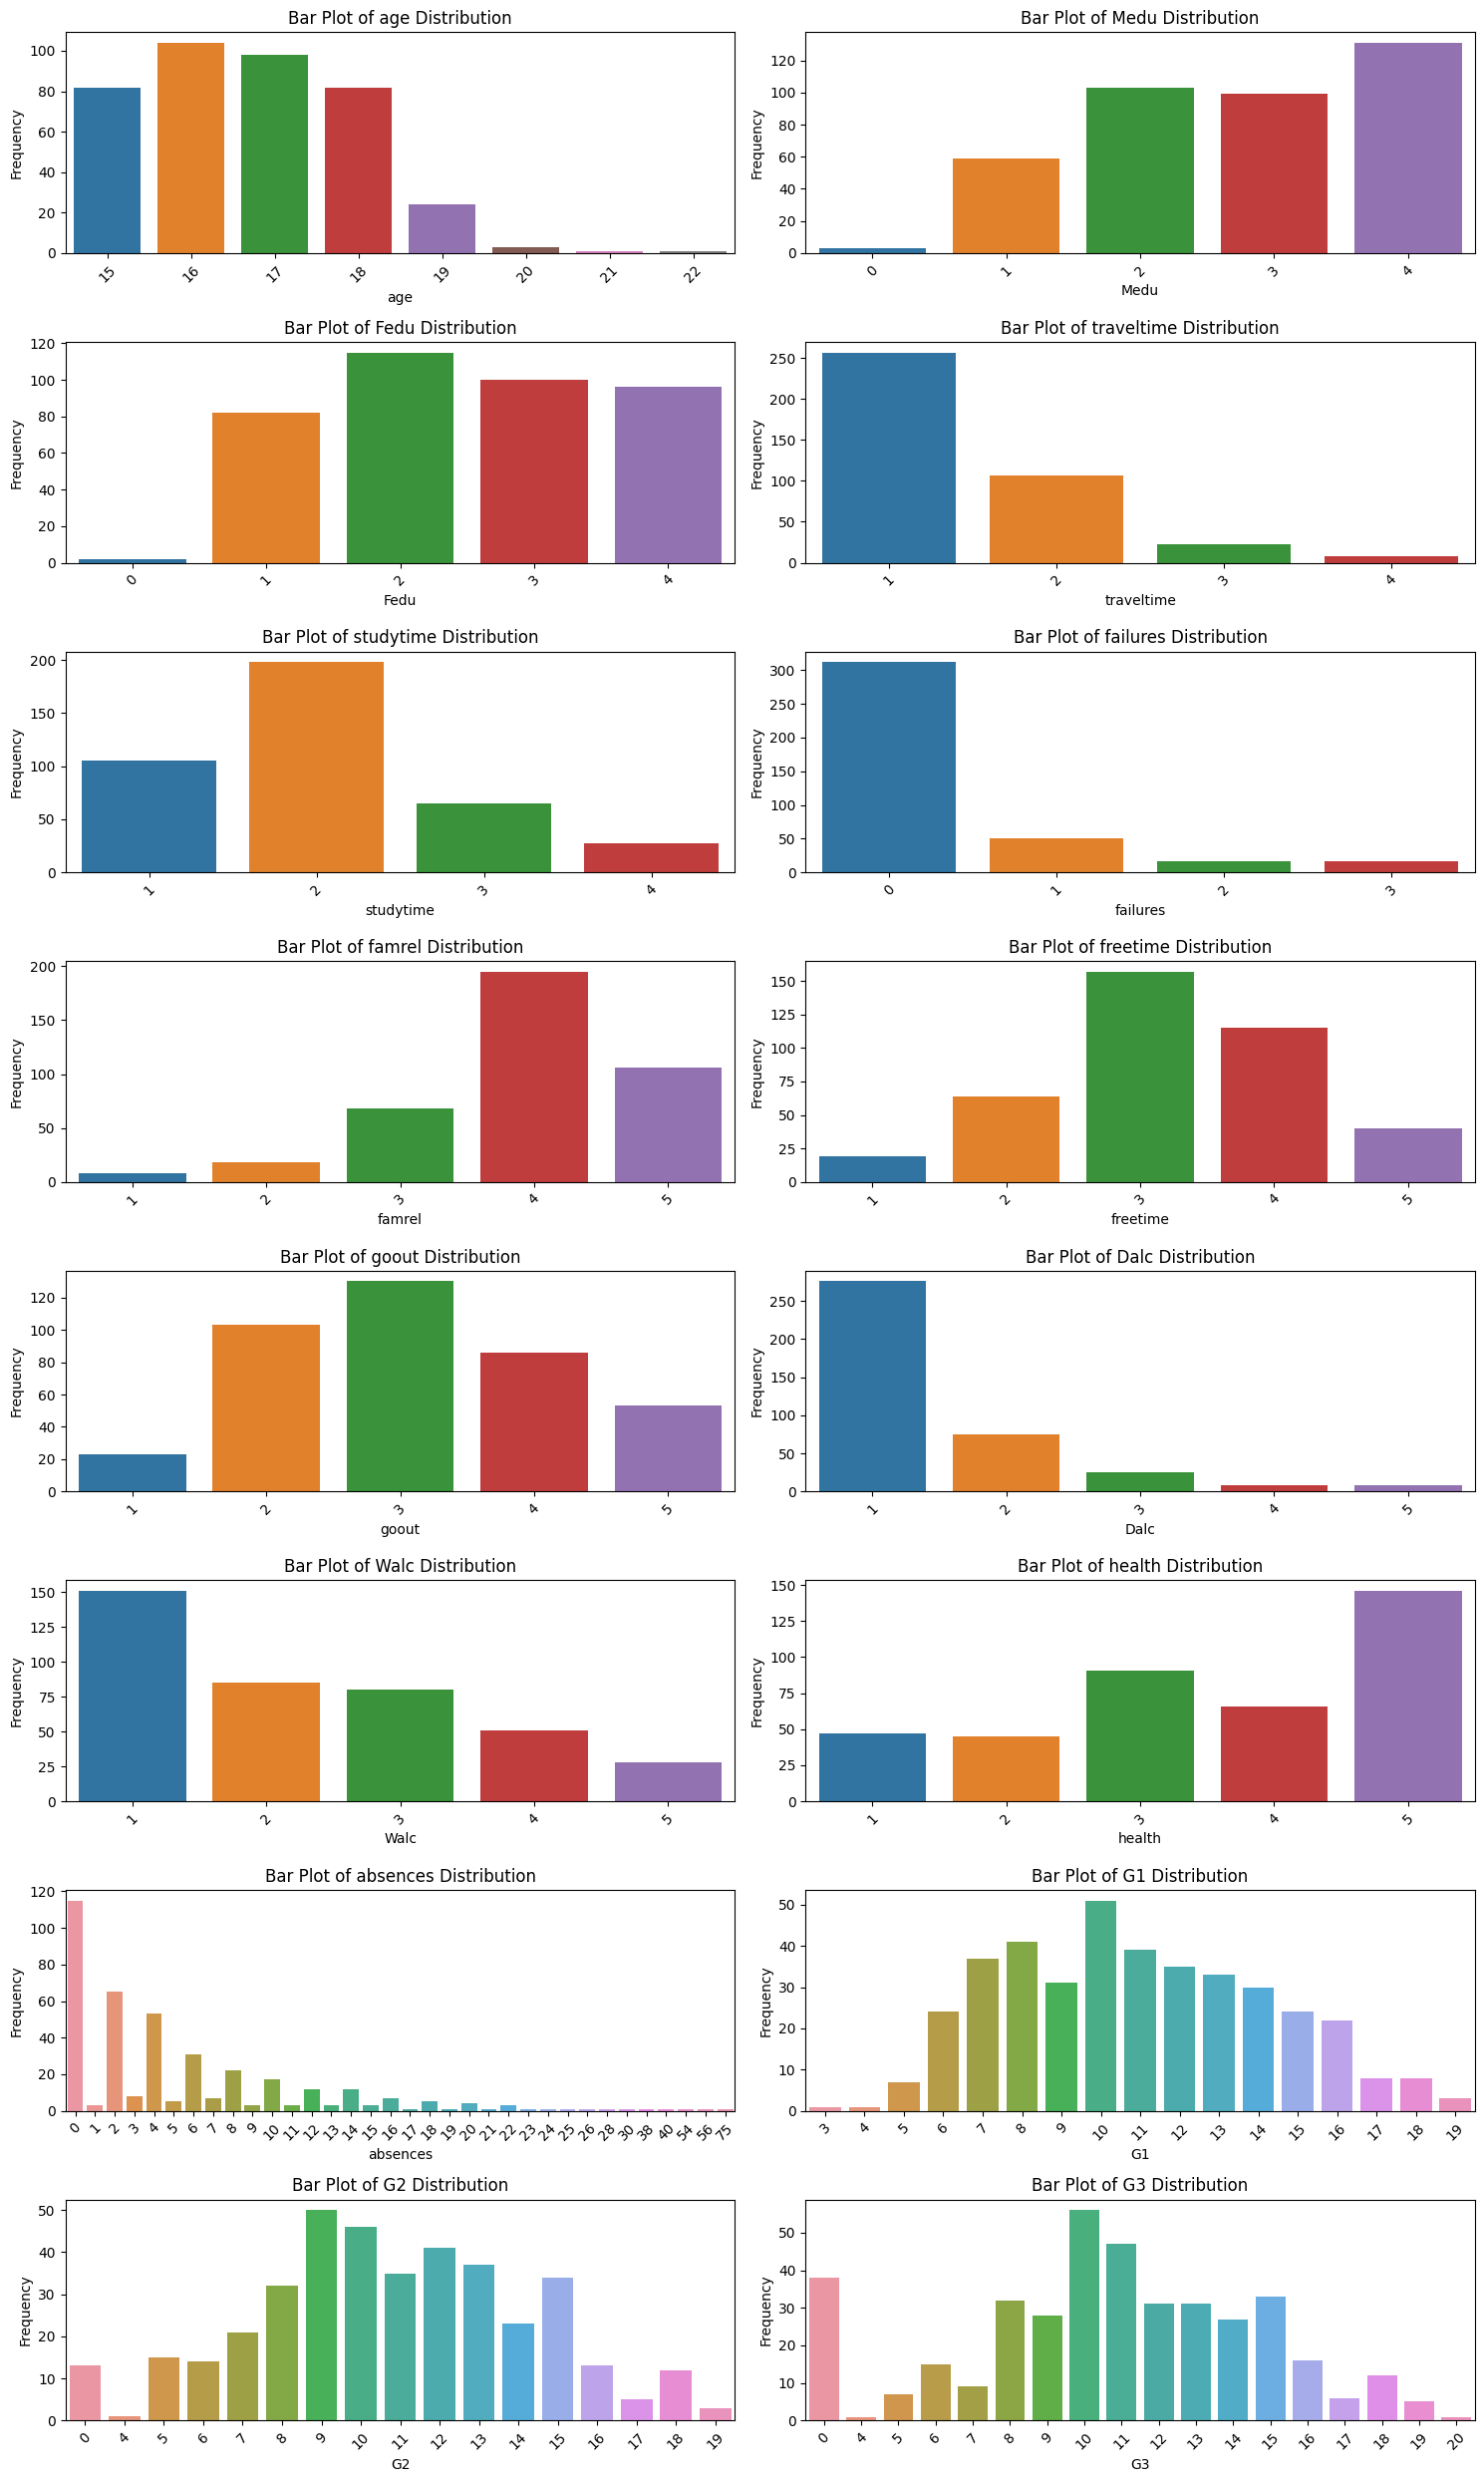

In [53]:
n_columns = len(num_features)
n_rows = (n_columns + 1) // 2

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 25))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numeric columns and plot them
for i, column in enumerate(num_features):
    if i < n_columns:
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Bar Plot of {column} Distribution')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
if n_columns < n_rows * 2:
    for j in range(n_columns, n_rows * 2):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

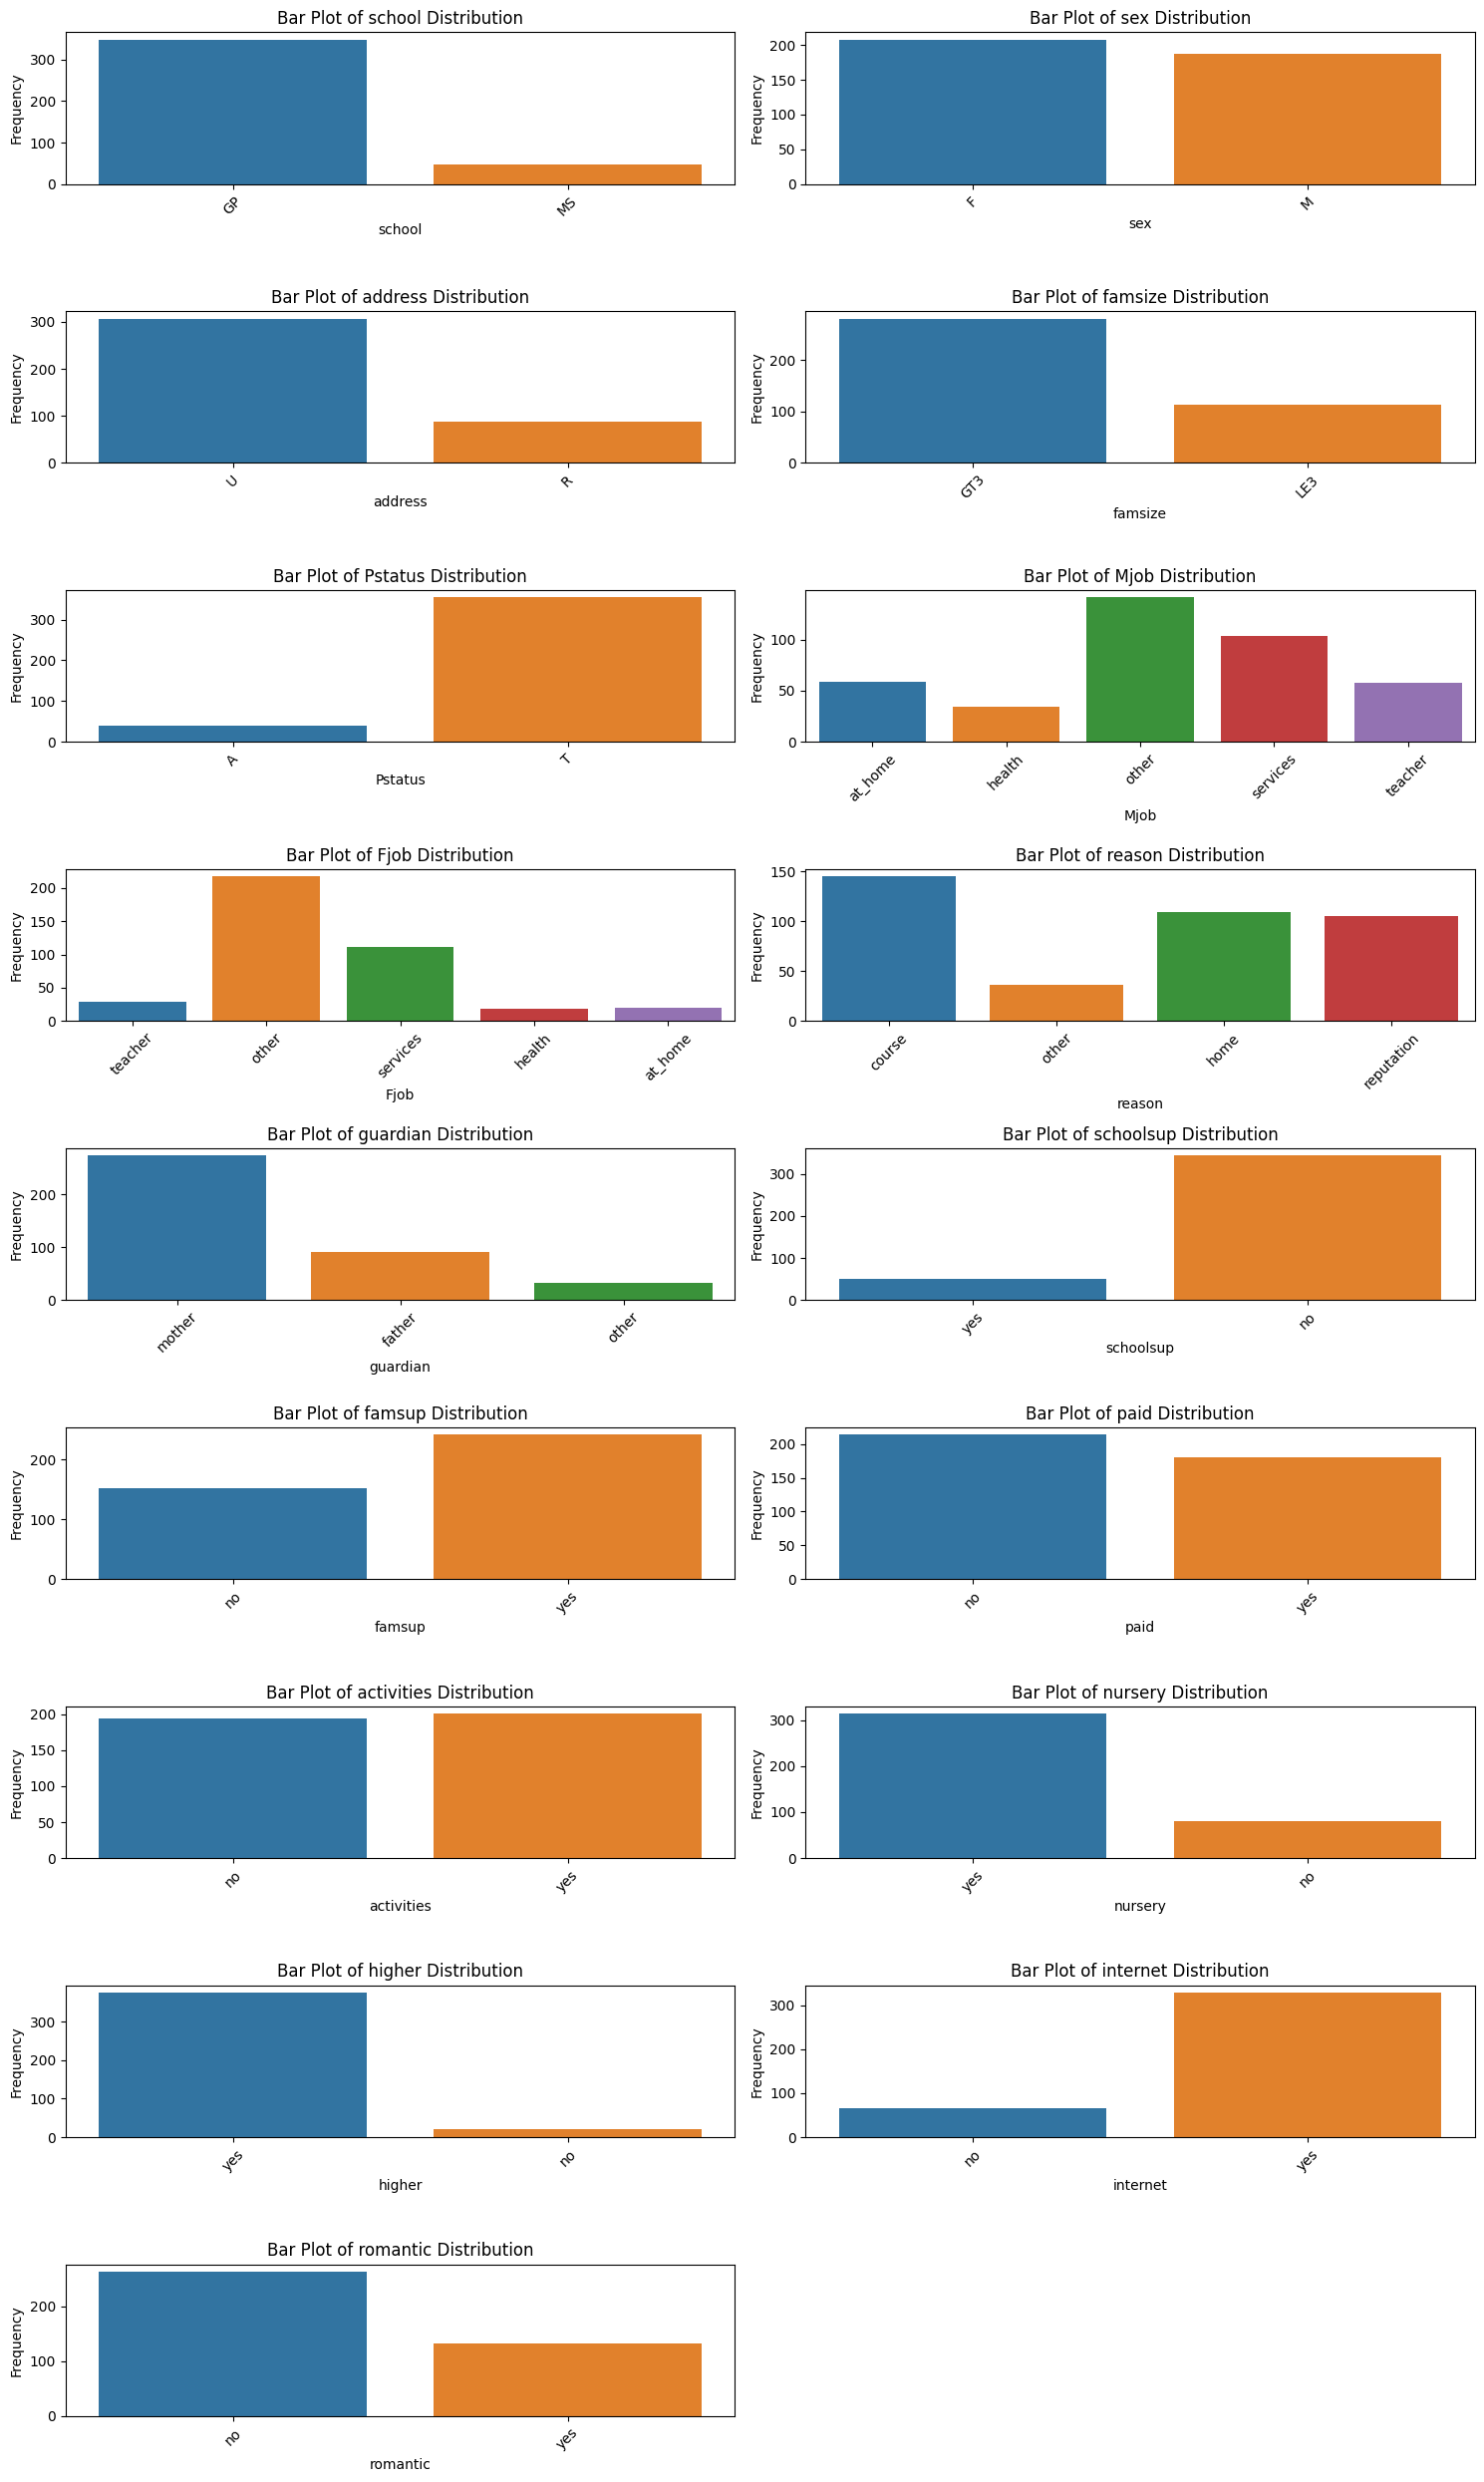

In [54]:
n_columns = len(cat_features)
n_rows = (n_columns + 1) // 2

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 25))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through categorical columns and plot them
for i, column in enumerate(cat_features):
    if i < n_columns:
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Bar Plot of {column} Distribution')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
if n_columns < n_rows * 2:
    for j in range(n_columns, n_rows * 2):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

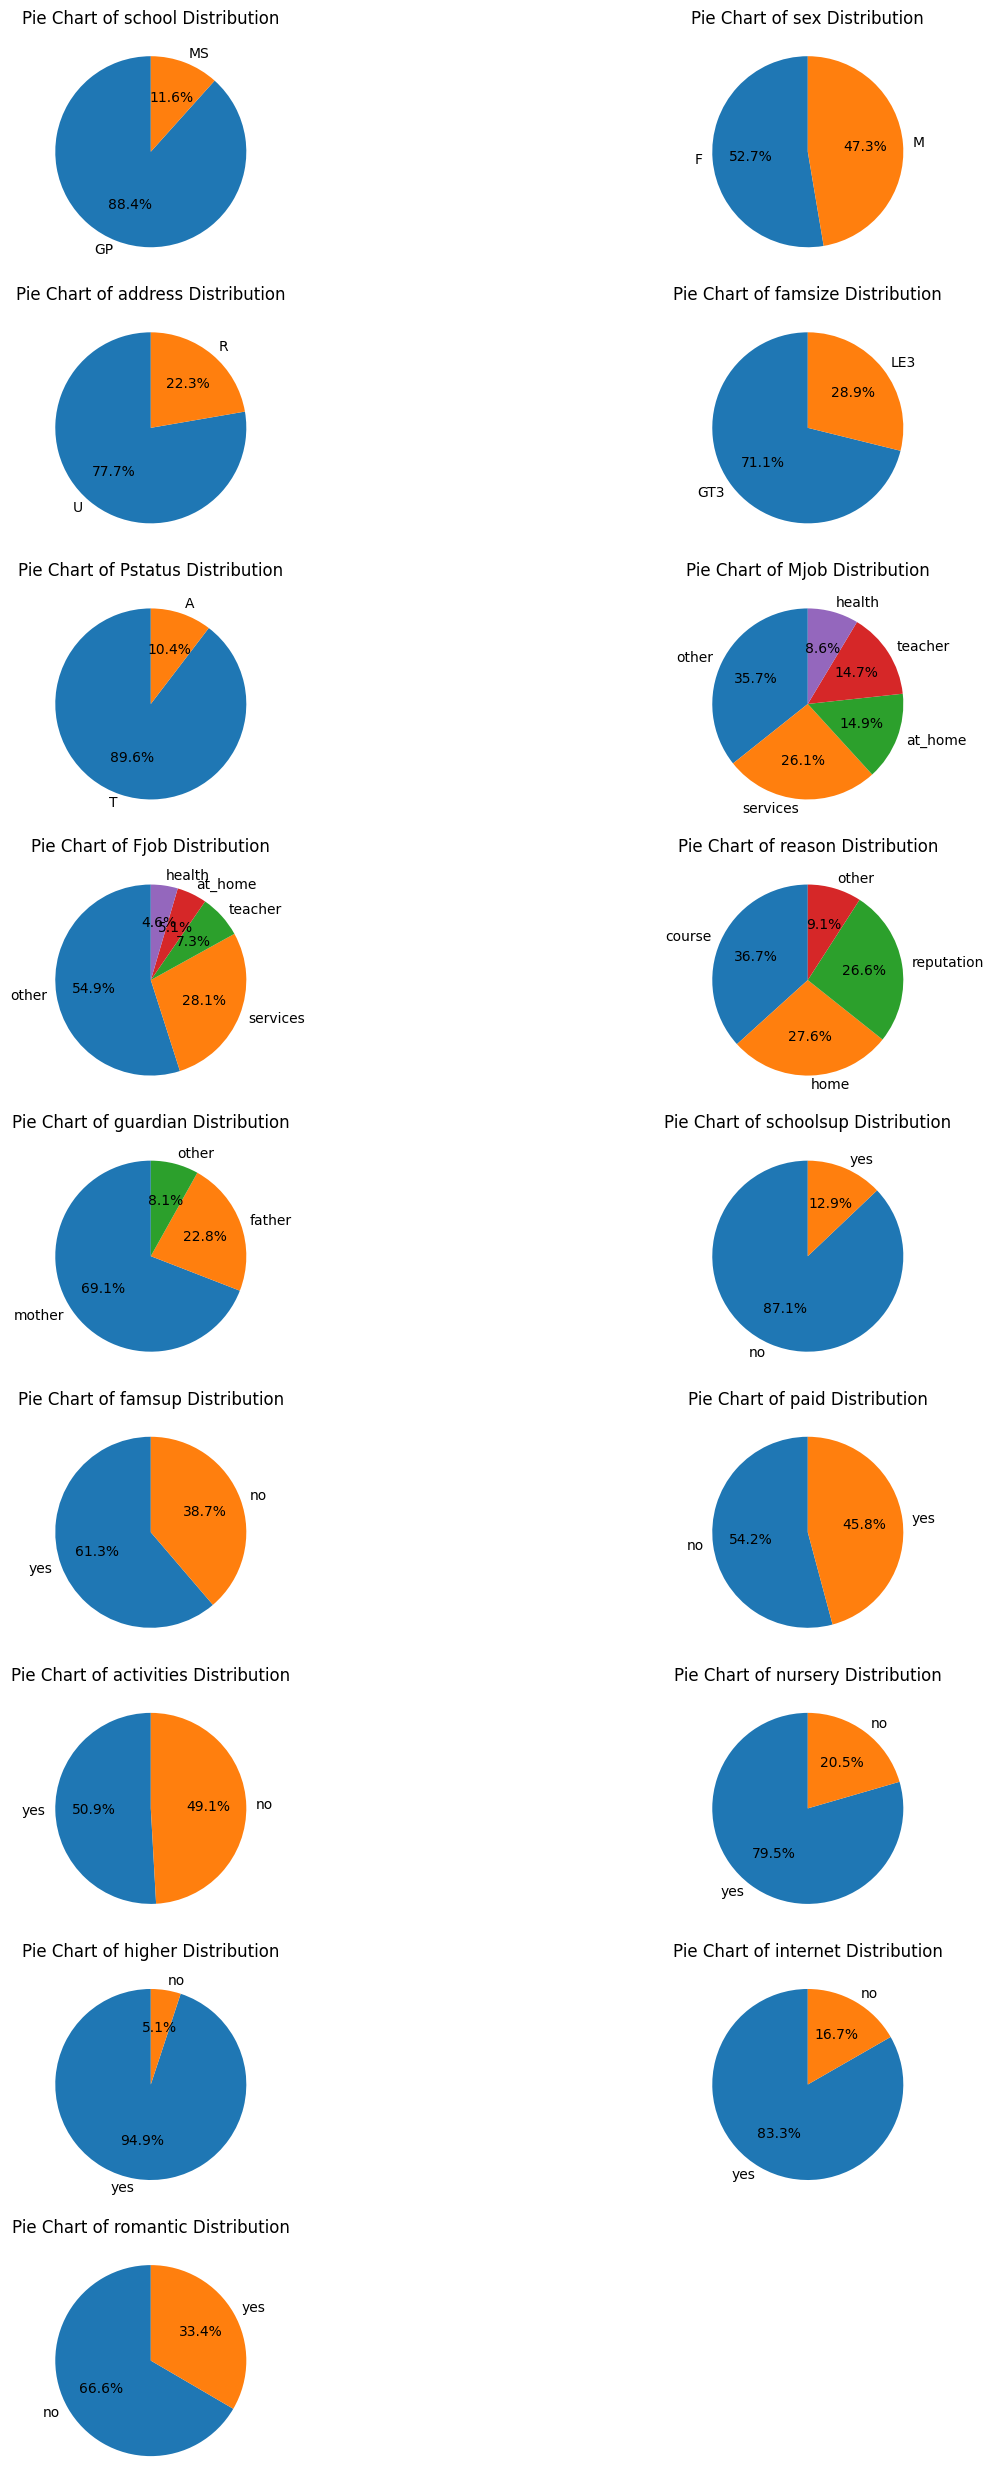

In [80]:
n_columns = len(cat_features)
n_rows = (n_columns + 1) // 2

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 25))

# Flatten the axes array for easier indexing
axes = axes.flatten()


# Iterate through categorical columns and plot pie charts
for i, column in enumerate(cat_features):
    if i < n_columns:
        # Calculate value counts for the column
        value_counts = df[column].value_counts()

        # Plot a pie chart
        axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Pie Chart of {column} Distribution')

# Remove any empty subplots
if n_columns < n_rows * 2:
    for j in range(n_columns, n_rows * 2):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

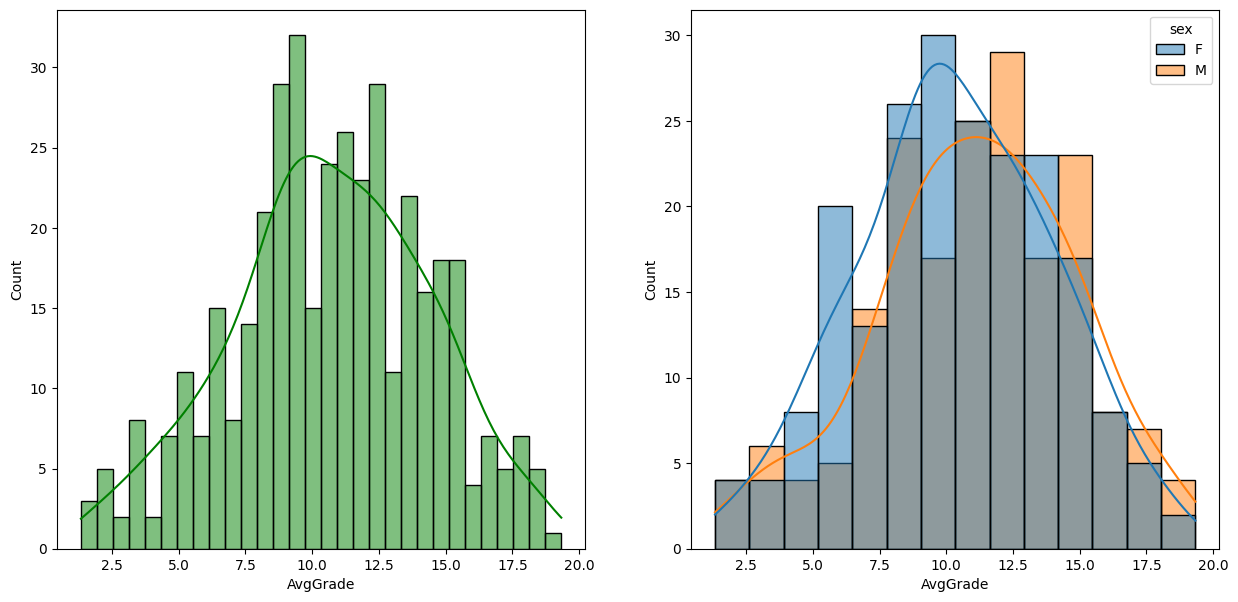

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='AvgGrade', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='AvgGrade', kde=True, hue='sex')
plt.show()

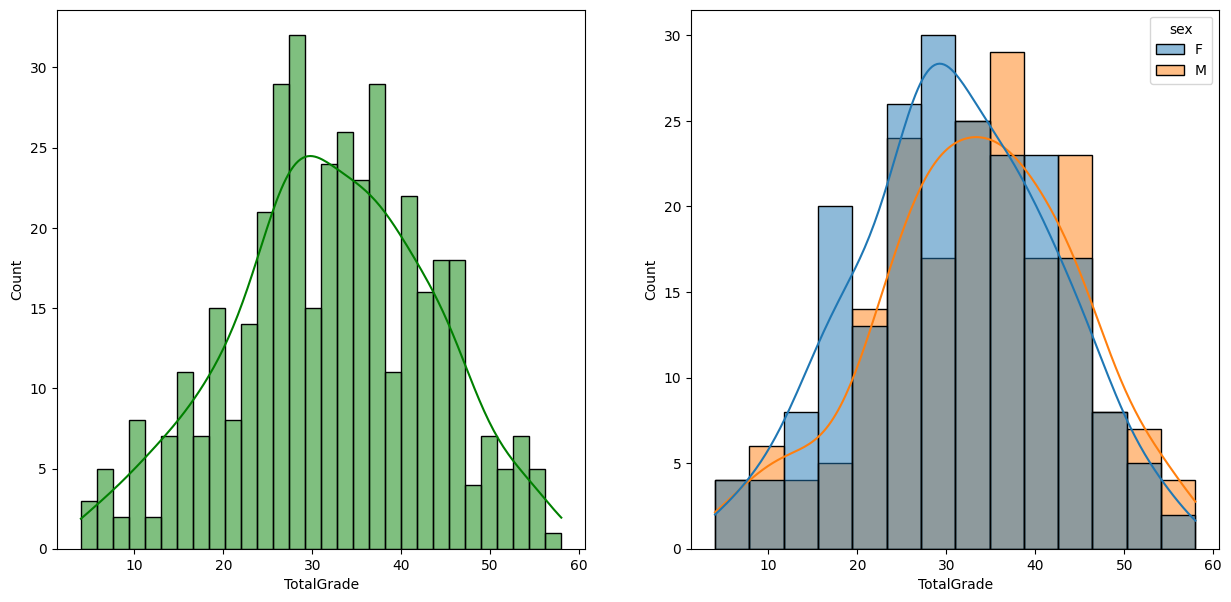

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='TotalGrade', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='TotalGrade', kde=True, hue='sex')
plt.show()

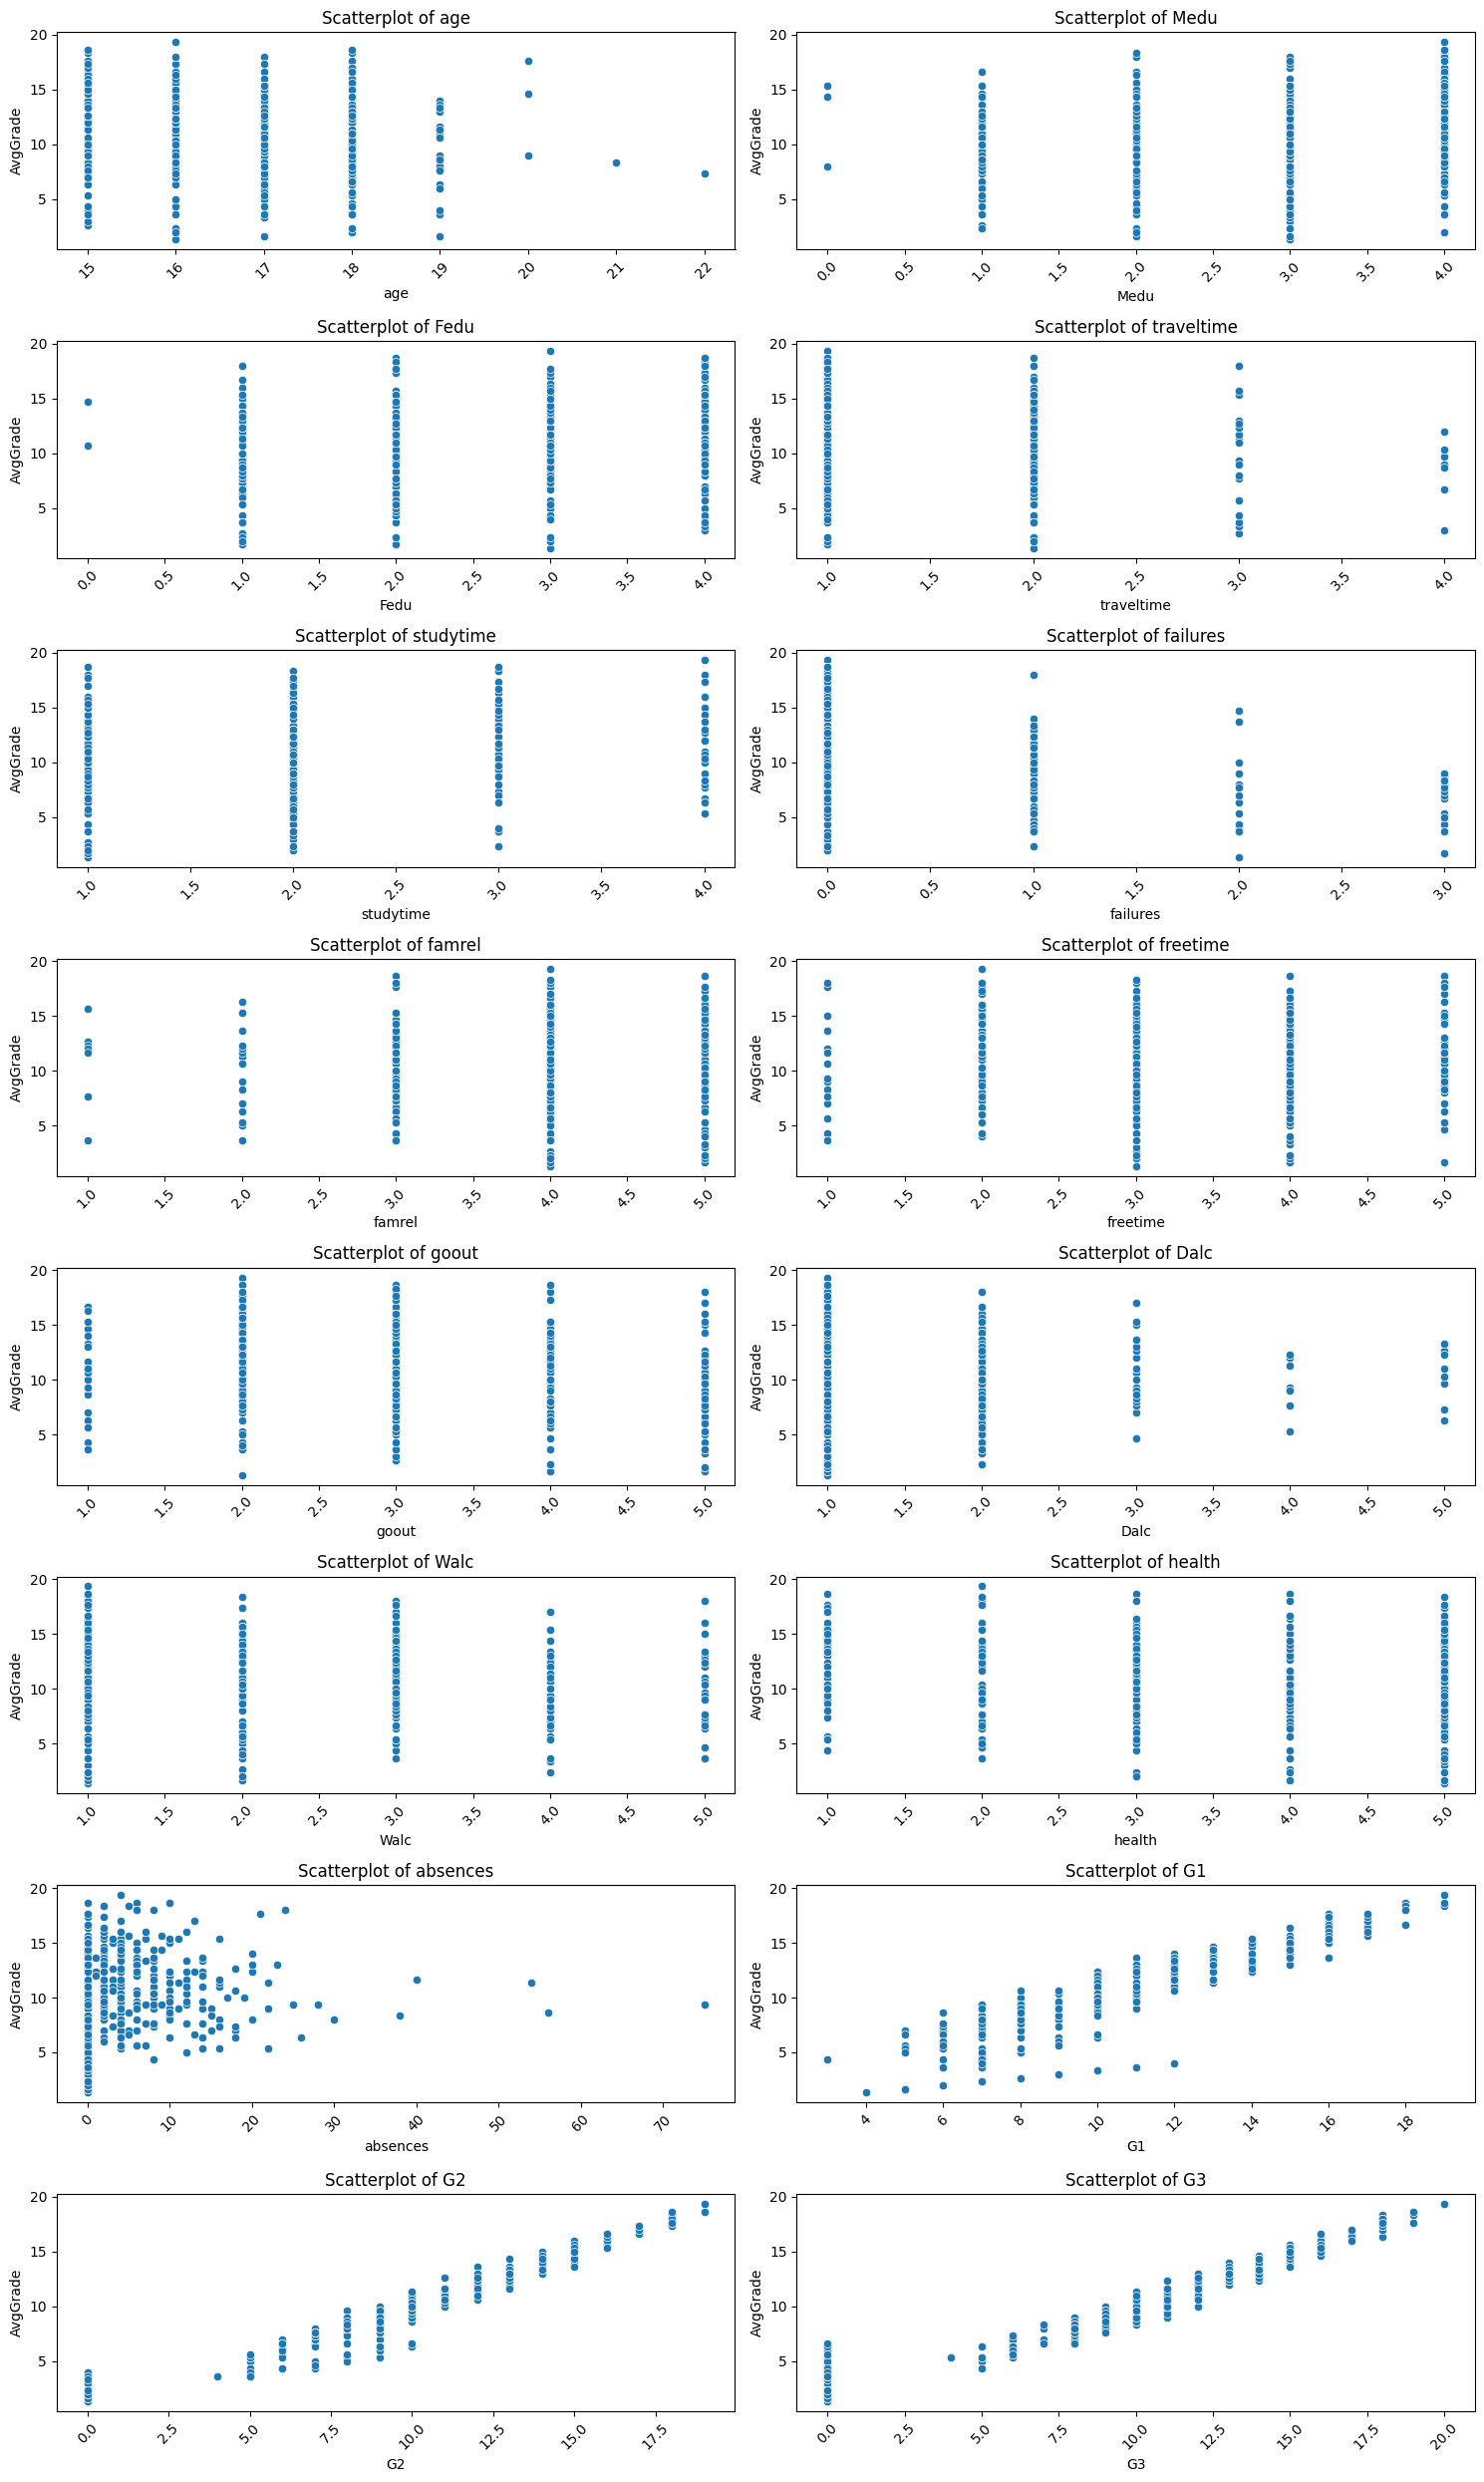

In [57]:
n_columns = len(num_features)
n_rows = (n_columns + 1) // 2

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 25))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numeric columns and plot them
for i, column in enumerate(num_features):
    if i < n_columns:
        sns.scatterplot(data=df, x=column, y='AvgGrade', ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('AvgGrade')
        axes[i].set_title(f'Scatterplot of {column}')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
if n_columns < n_rows * 2:
    for j in range(n_columns, n_rows * 2):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [63]:
# Select the numerical columns you want to include in the heatmap
num_features = df[['G1', 'G2', 'G3', 'TotalGrade', 'AvgGrade', 'age', 'Medu', 'Fedu']]

# Calculate the correlation matrix
correlation_matrix = num_features.corr()


/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Figure size 2500x1500 with 0 Axes>

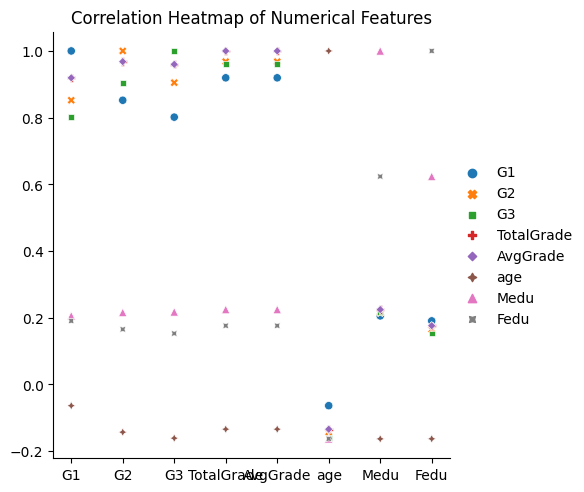

In [68]:
plt.figure(figsize=(25, 15))
sns.relplot(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

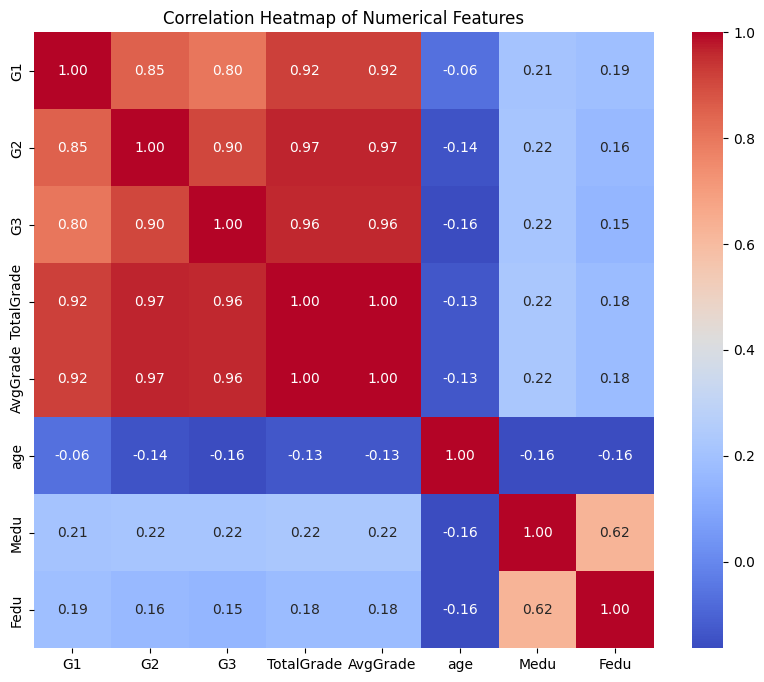

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

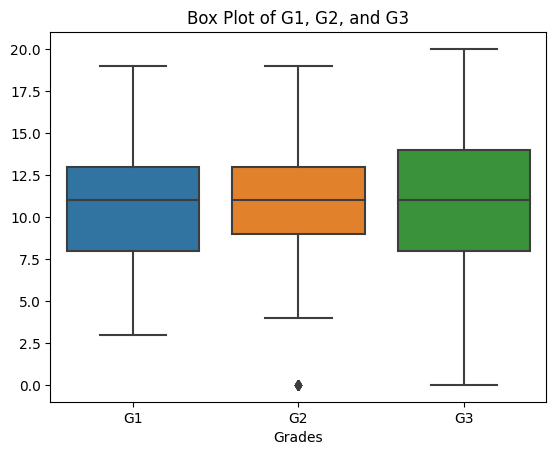

In [85]:
columns = ["G1", "G2", "G3"]

# Create a box plot for the selected columns
sns.boxplot(data=df[columns])

# Customize the plot (optional)
plt.title("Box Plot of G1, G2, and G3")
plt.xlabel("Grades")
plt.show()

In [112]:
X=df.drop(['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic','TotalGrade','AvgGrade'], axis=1 )

In [113]:
X.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [123]:
y=df[['TotalGrade']]

In [124]:
y.head(5)

,TotalGrade
0,17
1,16
2,25
3,44
4,26


In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [127]:
y_pred = model.predict(X_test)


In [128]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.0591387085106495e-29
R-squared: 1.0
